This project analyzes the relationship between Driving Distance and Scoring Average on the PGA Tour. The key insight I am
targeting is driving distance, as it relates to lower scores. The case study examins data from 170 players that have PGA Tour status in 2025.


 Rank                  Player  Scoring Average  Driving Distance
    1       Scottie Scheffler           68.478             303.3
    2            Rory McIlroy           69.249             320.6
    3         Tommy Fleetwood           69.862             296.1
    4        Thorbjørn Olesen           69.942             305.0
    5             Sepp Straka           69.967             295.0
    6              J.J. Spaun           69.977             304.7
    7          Russell Henley           69.989             286.1
    8             Ben Griffin           70.035             304.3
    9              Harry Hall           70.088             301.4
   10                Ryan Fox           70.100             305.3
   11              Bud Cauley           70.113             302.5
   12         Collin Morikawa           70.131             294.7
   13            Alex Smalley           70.163             306.0
   14           Justin Thomas           70.166             304.2
   15           Jordan Sp

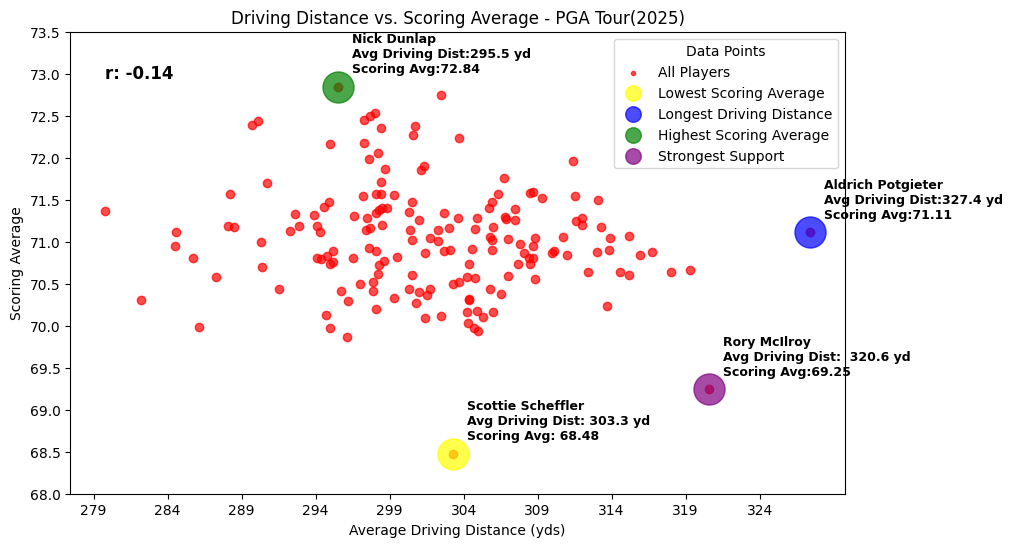

In [164]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_distance = pd.read_csv(('driving_distance_csv.csv'), index_col = 0)
df_scoring = pd.read_csv(('scoring_average_csv.csv'), index_col = 0)

#print("Distance Columns:", df_distance.columns)
#print("Scoring Average Columns:", df_scoring.columns)

#clean the csv file data and rename columns
df_distance.rename(columns={'PLAYER': 'Player', 'AVG': 'Driving Distance'}, inplace=True)
df_scoring.rename(columns={'Player': 'Player', 'Scoring_Avg': 'Scoring Average'}, inplace=True)

#merge the two csv files and drop any rows.columns that are missing data / convert
df_stats = pd.merge(df_distance, df_scoring, on='Player', how='inner')
df_stats ['Driving Distance'] = pd.to_numeric(df_stats['Driving Distance'], errors='coerce')
df_stats ['Scoring Average'] = pd.to_numeric(df_stats['Scoring Average'], errors='coerce')
df_stats = df_stats.dropna(subset=['Driving Distance','Scoring Average'])
#print(df_combined.head())

#sort the data set by scoring average from lowest to highest
df_stats.sort_values(by=['Scoring Average'], ascending=True, inplace=True)
#print(df_combined.head())

#reset row indexes and create new column title, assigning values starting at 1 and continue for full set
df_stats.reset_index(drop=True, inplace=True)
df_stats['Rank'] = range(1, len(df_stats) + 1)
#print(df_combined.head())

#Reorder column postioning
df_stats = df_stats[['Rank','Player', 'Scoring Average', 'Driving Distance']]
print(df_stats.head(170).to_string(index=False))

#Identify correlation of targeted data
correlation = df_stats['Driving Distance'].corr(df_stats['Scoring Average'])
#print(f"Correlation between Driving Distance and Scoring Average is: {correlation:.2f}")


#Prepare for plot of Best Player
best_index = y.idxmin()
best_player = df_stats.loc[best_index, 'Player']
best_player_distance = df_stats.loc[best_index, 'Driving Distance']
best_player_scoring = df_stats.loc[best_index, 'Scoring Average']

#Prepare plot for player with highest average Driving Distance
longest_driver_index = x.idxmax()
longest_driver_name = df_stats.loc[longest_driver_index, 'Player']
longest_driver_distance = df_stats.loc[longest_driver_index, 'Driving Distance']
longest_driver_scoring = df_stats.loc[longest_driver_index, 'Scoring Average']

#Prepare plot for player with highest Scoring Average
worst_score_index = df_stats['Scoring Average'].idxmax()
worst_player = df_stats.loc[worst_score_index, 'Player']
worst_player_distance = df_stats.loc[worst_score_index, 'Driving Distance']
worst_player_scoring = df_stats.loc[worst_score_index, 'Scoring Average']

#Prepare plot for longest driving distance with lowest scoring average
best_corr_index = df_stats['Scoring Average'].index[1]
best_corr = df_stats.loc[best_corr_index, 'Player']
best_corr_distance = df_stats.loc[best_corr_index, 'Driving Distance']
best_corr_scoring = df_stats.loc[best_corr_index, 'Scoring Average']

#Set x and y variables to be used as labels
x = df_stats['Driving Distance']
y = df_stats['Scoring Average']

#x axis min and max, starting at min and ending at max, every 5 ticks
x_min_ticks =(int(x.min()))
x_max_ticks =(int(x.max()))
ticks = np.arange(x_min_ticks, x_max_ticks + 1, 5)


plt.figure(figsize = (10,6))
#Plot all Players and average driving distance
plt.scatter(x,y,  alpha=0.7, label='All Players', color='red')
#Plot Best Player(lowest scoring average)
plt.scatter(x[best_index], y[best_index], alpha=0.7, label='Lowest Scoring Average', color='yellow', s=500)
label = f"{best_player}\nAvg Driving Dist: {best_player_distance:.1f} yd\nScoring Avg: {best_player_scoring:.2f}"
plt.annotate(
    label,
    (x[best_index], y[best_index]),
    textcoords='offset points',
    xytext=(10,10),
    ha='left',
    fontsize=9,
    fontweight='bold',
    color='black'
)
#Plot player with highest average Driving Distance
plt.scatter(x[longest_driver_index], y[longest_driver_index], alpha=0.7, label='Longest Driving Distance', s=500 , color='blue')
label_longdrive = f"{longest_driver_name}\nAvg Driving Dist:{longest_driver_distance:.1f} yd\nScoring Avg:{longest_driver_scoring:.2f}"
plt.annotate(
    label_longdrive,
    (x[longest_driver_index], y[longest_driver_index]),
    textcoords="offset points",
    xytext=(10, 10),
    ha='left',
    fontsize=9,
    fontweight='bold',
    color='black'
)
#Plot player with highest Scoring Average
plt.scatter(x[worst_score_index], y[worst_score_index], alpha=0.7, label='Highest Scoring Average', s=500, color='green')
label_worstscore = f"{worst_player}\nAvg Driving Dist:{worst_player_distance:.1f} yd\nScoring Avg:{worst_player_scoring:.2f}"
plt.annotate(
    label_worstscore,
    (x[worst_score_index], y[worst_score_index]),
    textcoords="offset points",
    xytext=(10, 10),
    ha='left',
    fontsize=9,
    fontweight='bold',
    color='black'
)
#Plot player with best correlation of driving distance and scoring average
plt.scatter(x[best_corr_index], y[best_corr_index], alpha=0.7, label='Strongest Support', s=500, color='purple')
label_bestcorr = f"{best_corr}\nAvg Driving Dist:  {best_corr_distance:.1f} yd\nScoring Avg:{best_corr_scoring:.2f}"
plt.annotate(
    label_bestcorr,
    (x[best_corr_index], y[best_corr_index]),
    textcoords="offset points",
    xytext=(10, 10),
    ha='left',
    fontsize=9,
    fontweight='bold',
    color='black'
)
plt.grid(False)
plt.title('Driving Distance vs. Scoring Average - PGA Tour(2025)')
plt.xlabel('Average Driving Distance (yds)')
plt.ylabel('Scoring Average')
plt.yticks([68, 68.5, 69, 69.5, 70, 70.5, 71, 71.5, 72, 72.5, 73, 73.5])
plt.xticks(ticks)
plt.legend(title='Data Points', markerscale=0.5, fontsize=10)
plt.text(
    x.min(),  # x-position (adjust as needed)
    y.max() + 0.1,  # y-position slightly above the top point
    f"r: {correlation:.2f}",
    fontsize=12,
    fontweight='bold',
    color='black'
)
plt.savefig('pga_tour_data.png', dpi=300, bbox_inches='tight')
plt.show()

df_stats.to_csv('PGA_Tour_Data.csv', index=False)


The analysis found an indirect relationship between a higher driving distance and lower scoring average. The correlation, in fact, was rather weak with a represented coefficient of (-.14). While longer drives may lead to lower scores, they are not a direct factor in a players scoring average. As the study confirms, the player with the longest driving distance (Aldrich Potgieter), has a scoring average that's 2.63 strokes higher than the scoring average leader, and World #1 (Scottie Scheffler),while maintaining an average driving distance that is 24.1 yards longer than Scheffler. While there is a weak correlation between the two data points, Rory McIlroy displays the best correlation of all PGA Tour players. Currently #2 in the World Rankings, Rory ranks #2 in Driving Distance and Scoring Average in both PGA Tour stat categories.